In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])
plt.rcParams["lines.markersize"] = 9.0

from pydftlj.dft import DFT

# Author: Elvis do A. Soares
# Github: @elvissoares
# Date: 2024-09-30

# Hard-Sphere Fluid Near Hardwall

## Defining the systems with different Functionals 
- RF: Rosenfeld Functional
- WBI: White-Bear mark I
- WBII: White Bear mark II

In [5]:
DFTRF = DFT(ndim=1,functional='RF')
DFTWBI = DFT(ndim=1,functional='WBI')
DFTWBII = DFT(ndim=1,functional='WBII')

DFTs = [DFTRF,DFTWBI,DFTWBII]

### Define the Fluid Properties

In [6]:
sigmaff = 1.0 # the size of the hard-sphere

In [7]:
for DFT in DFTs:
    DFT.Set_FluidProperties(sigma=sigmaff,epsilon=0.0)

### Defining the Slab Geometry

In [8]:
L = 20.0*sigmaff # the length of the system

In [9]:
for DFT in DFTs:
    DFT.Set_Gridsize(gridsize=0.01)
    DFT.Set_Geometry(box_dimensions=L)

## Setting the External Potential for a Hard-Wall

In [10]:
for DFT in DFTs:
    Vext = np.zeros(DFT.Ngrid[0])
    Vext[DFT.X < 0.5] = np.inf
    Vext[DFT.X > L- 0.5] = np.inf
    DFT.Set_External_Potential(Vext)

In [11]:
for DFT in DFTs:
    DFT.Set_Solver_Equilibrium(solver='abc-fire',alpha=0.15,dt=0.01)

# Compare with data from Groot 1987

 _Reference:_  Groot, R. D., Faber, N. M., & Van der Eerden, J. P. (1987). Hard sphere fluids near a hard wall and a hard cylinder. Molecular Physics, 62(4), 861-874.

In [12]:
dataMC = pd.read_excel('../examples/data/MC/MCdata-hardspheres-hardwall-Groot1987.xls', sheet_name='HardWall')

0.715 0.37437312455278365
0.758 0.39688787190351055
0.813 0.4256858045614169
0.9135 0.478307481509046


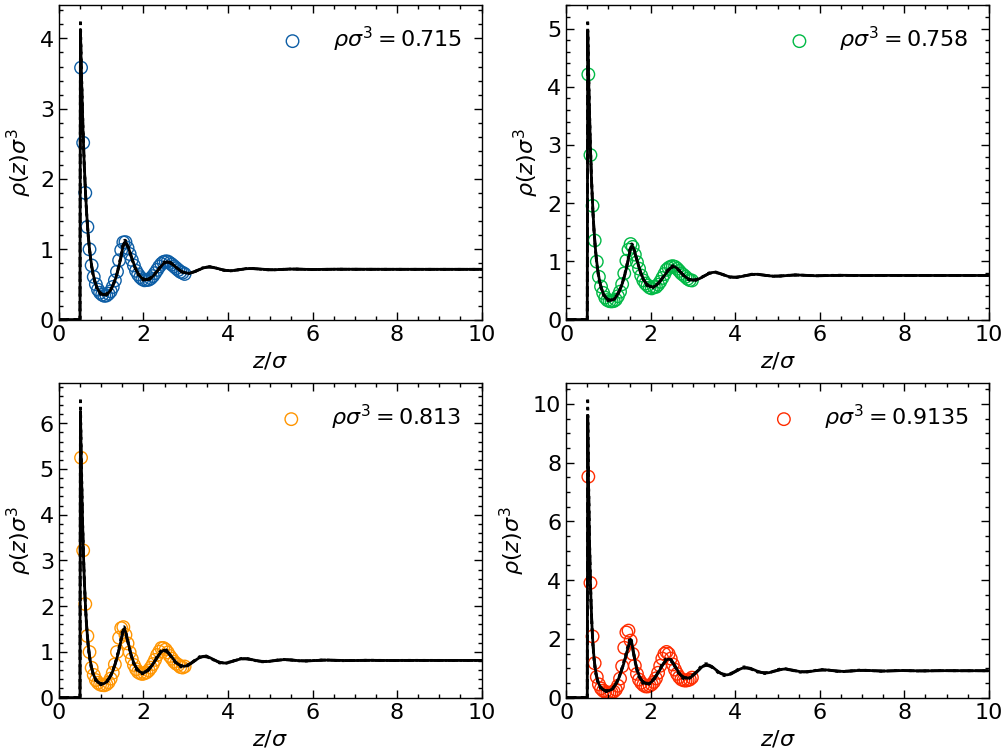

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

rhob = np.array([0.715,0.758,0.813,0.9135])
colors = ['C0','C1','C2','C3']

# loop through tickers and axes
for i, ax in zip(range(rhob.size), axs.ravel()):
    ax.scatter(dataMC['z'],dataMC['rho='+str(rhob[i])],marker='o',edgecolors=colors[i],facecolors='none',label=r'$\rho \sigma^3=$'+str(rhob[i]))

    print(rhob[i],rhob[i]*np.pi/6)

    for DFT in DFTs:
        DFT.Set_BulkDensity(rhob[i])
        DFT.Set_InitialCondition()
        DFT.Calculate_Equilibrium()

    ax.plot(DFTRF.X,DFTRF.rho.cpu(),':',color='k')
    ax.plot(DFTWBI.X,DFTWBI.rho.cpu(),'-',color='k')
    ax.plot(DFTWBII.X,DFTWBII.rho.cpu(),'--',color='k')

    # chart formatting
    ax.set_xlabel(r'$z/\sigma$')
    ax.set_ylabel(r'$\rho(z)\sigma^3$')
    ax.set_xlim(0.0,L/2)
    ax.set_ylim(bottom=0.0)
    ax.legend(loc='upper right')

# Compare with Fig. 1 from Roth 2010

Roth, R. (2010). Fundamental measure theory for hard-sphere mixtures: a review. Journal of Physics: Condensed Matter, 22(6), 063102.

In [14]:
rhob = 0.813

0.813 0.4256858045614169


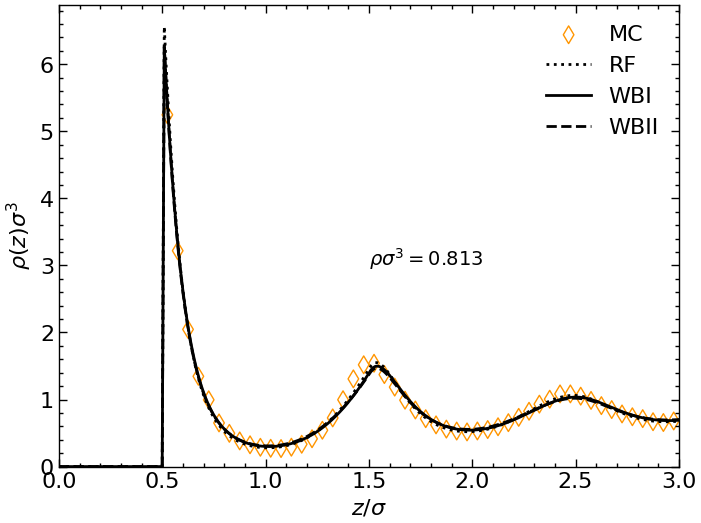

In [15]:
plt.scatter(dataMC['z'],dataMC['rho='+str(rhob)],marker='d',edgecolors='C2',facecolors='none',label='MC')

print(rhob,rhob*np.pi/6)

for DFT in DFTs:
    DFT.Set_BulkDensity(rhob)
    DFT.Set_InitialCondition()
    DFT.Calculate_Equilibrium()

plt.plot(DFTRF.X,DFTRF.rho.cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.X,DFTWBI.rho.cpu(),'-',color='k',label='WBI')
plt.plot(DFTWBII.X,DFTWBII.rho.cpu(),'--',color='k',label='WBII')

# chart formatting
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')
plt.xlim(0.0,3)
plt.text(1.5,3,r'$\rho \sigma^3=$'+str(rhob),fontsize=14)
plt.ylim(bottom=0.0)
plt.legend(loc='upper right')

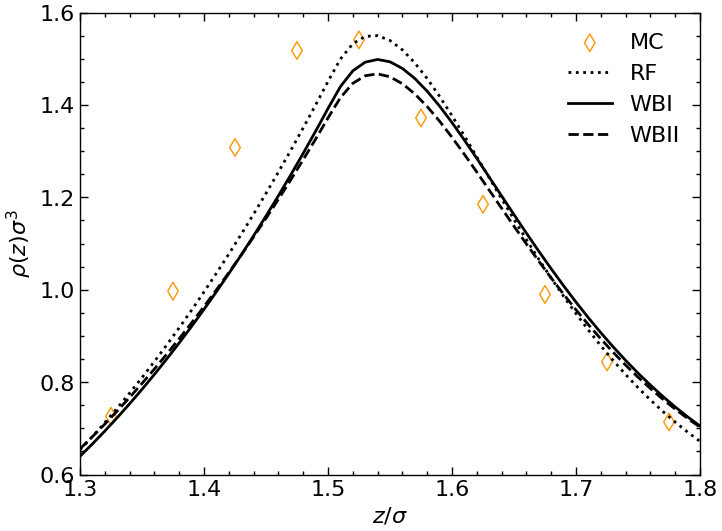

In [16]:
plt.scatter(dataMC['z'],dataMC['rho='+str(rhob)],marker='d',edgecolors='C2',facecolors='none',label='MC')

plt.plot(DFTRF.X,DFTRF.rho.cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.X,DFTWBI.rho.cpu(),'-',color='k',label='WBI')
plt.plot(DFTWBII.X,DFTWBII.rho.cpu(),'--',color='k',label='WBII')

# chart formatting
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')
plt.xlim(1.3,1.8)
plt.ylim(0.6,1.6)
plt.legend(loc='upper right')

In [16]:
rhob = 0.9135

0.813 0.4256858045614169


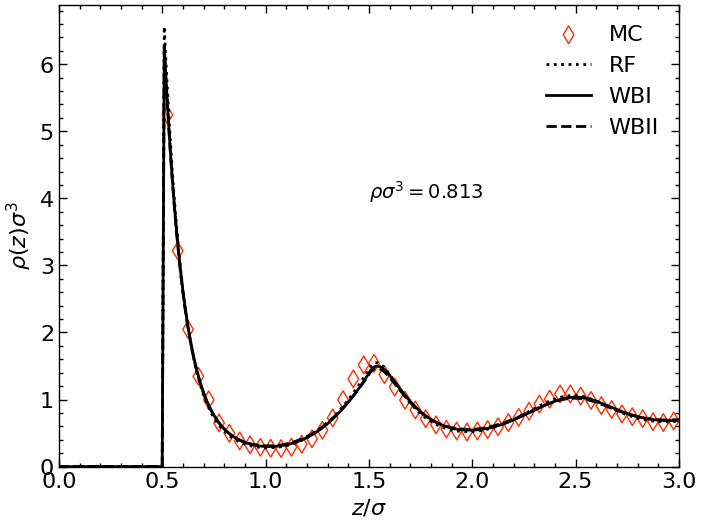

In [17]:
plt.scatter(dataMC['z'],dataMC['rho='+str(rhob)],marker='d',edgecolors='C3',facecolors='none',label='MC')

print(rhob,rhob*np.pi/6)

for DFT in DFTs:
    DFT.Set_BulkDensity(rhob)
    DFT.Set_InitialCondition()
    DFT.Calculate_Equilibrium()

plt.plot(DFTRF.X,DFTRF.rho.cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.X,DFTWBI.rho.cpu(),'-',color='k',label='WBI')
plt.plot(DFTWBII.X,DFTWBII.rho.cpu(),'--',color='k',label='WBII')

# chart formatting
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')
plt.xlim(0.0,3)
plt.text(1.5,4,r'$\rho \sigma^3=$'+str(rhob),fontsize=14)
plt.ylim(bottom=0.0)
plt.legend(loc='upper right')

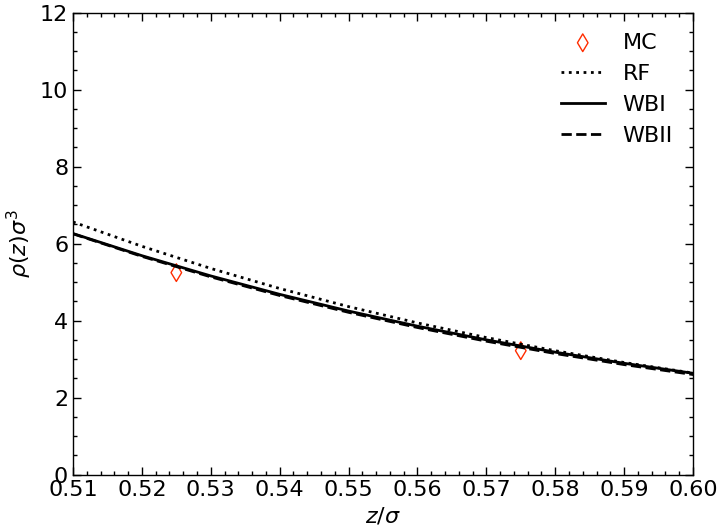

In [19]:
plt.scatter(dataMC['z'],dataMC['rho='+str(rhob)],marker='d',edgecolors='C3',facecolors='none',label='MC')

plt.plot(DFTRF.X,DFTRF.rho.cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.X,DFTWBI.rho.cpu(),'-',color='k',label='WBI')
plt.plot(DFTWBII.X,DFTWBII.rho.cpu(),'--',color='k',label='WBII')

# chart formatting
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')
plt.xlim(0.51,0.6)
plt.ylim(0.0,12.0)
plt.legend(loc='upper right')

# Near Cylinder situated at r = 0 (2D geometry)

In [19]:
L = 12.0

In [20]:
for DFT in DFTs:
    DFT.Set_Dimension(ndim=2)
    DFT.Set_Gridsize(gridsize=0.02)
    DFT.Set_Geometry(box_dimensions=(L,L))

In [21]:
for DFT in DFTs:
    Vext = np.zeros(DFT.Ngrid)
    # Putting the hard cylinder situated at r = 0
    Vext[(DFT.X-0.5*L)**2+(DFT.Y-0.5*L)**2 < 1.0] = np.inf
    DFT.Set_External_Potential(Vext)

In [22]:
rhob = 0.588

for DFT in DFTs:
    DFT.Set_BulkDensity(rhob)
    DFT.Set_InitialCondition()
    DFT.Set_Solver_Equilibrium(solver='abc-fire')
    DFT.Calculate_Equilibrium()

KeyboardInterrupt: 

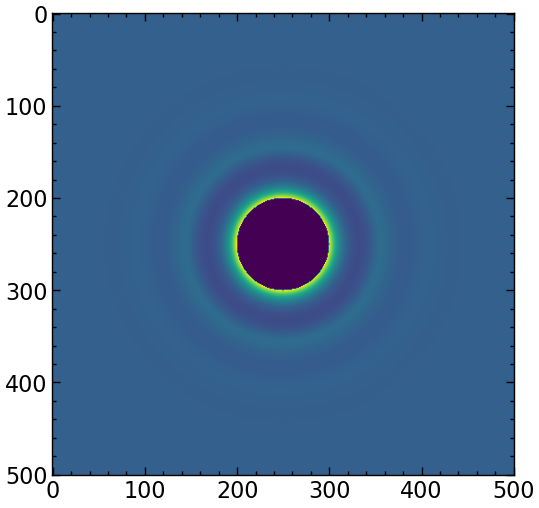

In [20]:
plt.imshow(DFTRF.rho.cpu())

In [21]:
dataMC = pd.read_excel('../examples/data/MC/MCdata-hardspheres-hardwall-Groot1987.xls', sheet_name='HardCylinder')

Text(0.5, 1.0, 'Density profile near a hard cylinder situated at r = 0')

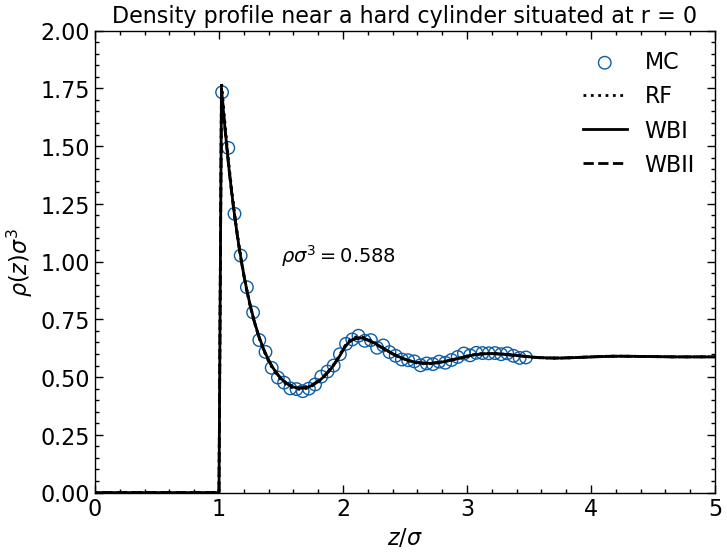

In [22]:
plt.scatter(dataMC['r'],dataMC['rho='+str(rhob)],marker='o',edgecolors='C0',facecolors='none',label='MC')

plt.plot(DFTRF.X[:,DFTRF.Ngrid[1]//2]-0.5*L,DFTRF.rho[:,DFTRF.Ngrid[1]//2].cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.X[:,DFTWBI.Ngrid[1]//2]-0.5*L,DFTWBI.rho[:,DFTWBI.Ngrid[1]//2].cpu(),'-',color='k',label='WBI')
plt.plot(DFTWBII.X[:,DFTWBII.Ngrid[1]//2]-0.5*L,DFTWBII.rho[:,DFTWBII.Ngrid[1]//2].cpu(),'--',color='k',label='WBII')

# chart formatting
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')
plt.xlim(0.0,L/2)
plt.text(1.5,1,r'$\rho \sigma^3=$'+str(rhob),fontsize=14)
plt.ylim(0.0,2.0)
plt.legend(loc='upper right')
plt.title('Density profile near a hard cylinder situated at r = 0')

In [25]:
rhob = 0.748

# Wait a while
for DFT in DFTs:
    DFT.Set_BulkDensity(rhob)
    DFT.Set_InitialCondition()
    DFT.Set_Solver_Equilibrium(solver='abc-fire')
    DFT.Calculate_Equilibrium()

Text(0.5, 1.0, 'Density profile near a hard cylinder situated at r = 0')

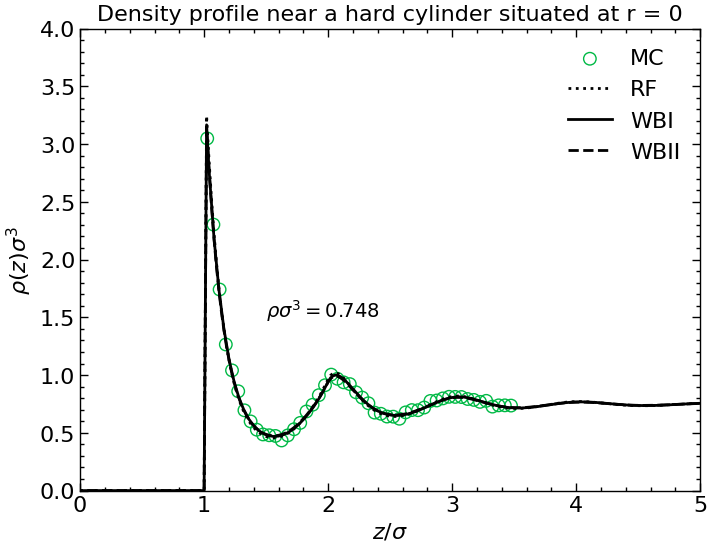

In [27]:
plt.scatter(dataMC['r'],dataMC['rho='+str(rhob)],marker='o',edgecolors='C1',facecolors='none',label='MC')

plt.plot(DFTRF.X[:,DFTRF.Ngrid[1]//2]-0.5*L,DFTRF.rho[:,DFTRF.Ngrid[1]//2].cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.X[:,DFTWBI.Ngrid[1]//2]-0.5*L,DFTWBI.rho[:,DFTWBI.Ngrid[1]//2].cpu(),'-',color='k',label='WBI')
plt.plot(DFTWBII.X[:,DFTWBII.Ngrid[1]//2]-0.5*L,DFTWBII.rho[:,DFTWBII.Ngrid[1]//2].cpu(),'--',color='k',label='WBII')

# chart formatting
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')
plt.xlim(0.0,L/2)
plt.text(1.5,1.5,r'$\rho \sigma^3=$'+str(rhob),fontsize=14)
plt.ylim(0.0,4)
plt.legend(loc='upper right')
plt.title('Density profile near a hard cylinder situated at r = 0')